In [22]:
import csv
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import community


# Importing the CSV file

In [2]:
df=pd.read_csv("battles.csv",sep=';')
#print(df.head(10))
print df.ix[1,2]
df


2


,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note,Unnamed: 25
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1,Golden Tooth,The Westerlands,NaN,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1,Mummer's Ford,The Riverlands,NaN,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1,Riverrun,The Riverlands,NaN,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1,Green Fork,The Riverlands,NaN,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1,Whispering Wood,The Riverlands,NaN,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1,Riverrun,The Riverlands,NaN,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,...,0,NaN,NaN,Gregor Clegane,Lyman Darry,1,Darry,The Riverlands,NaN,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0,NaN,NaN,Victarion Greyjoy,NaN,1,Moat Cailin,The North,NaN,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0,1000.0,NaN,Asha Greyjoy,NaN,1,Deepwood Motte,The North,NaN,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0,264.0,NaN,Theon Greyjoy,NaN,1,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...,NaN


In [3]:
df.columns

Index([u'name', u'year', u'battle_number', u'attacker_king', u'defender_king',
       u'attacker_1', u'attacker_2', u'attacker_3', u'attacker_4',
       u'defender_1', u'defender_2', u'defender_3', u'defender_4',
       u'attacker_outcome', u'battle_type', u'major_death', u'major_capture',
       u'attacker_size', u'defender_size', u'attacker_commander',
       u'defender_commander', u'summer', u'location', u'region', u'note',
       u'Unnamed: 25'],
      dtype='object')

In [4]:
df[['attacker_king','attacker_1',u'attacker_commander']]

,attacker_king,attacker_1,attacker_commander
0,Joffrey/Tommen Baratheon,Lannister,Jaime Lannister
1,Joffrey/Tommen Baratheon,Lannister,Gregor Clegane
2,Joffrey/Tommen Baratheon,Lannister,"Jaime Lannister, Andros Brax"
3,Robb Stark,Stark,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H..."
4,Robb Stark,Stark,"Robb Stark, Brynden Tully"
5,Robb Stark,Stark,"Robb Stark, Tytos Blackwood, Brynden Tully"
6,Joffrey/Tommen Baratheon,Lannister,Gregor Clegane
7,Balon/Euron Greyjoy,Greyjoy,Victarion Greyjoy
8,Balon/Euron Greyjoy,Greyjoy,Asha Greyjoy
9,Balon/Euron Greyjoy,Greyjoy,Theon Greyjoy


# DANI'S TyPING

In [5]:
df[[u'attacker_1',u'attacker_king']]

,attacker_1,attacker_king
0,Lannister,Joffrey/Tommen Baratheon
1,Lannister,Joffrey/Tommen Baratheon
2,Lannister,Joffrey/Tommen Baratheon
3,Stark,Robb Stark
4,Stark,Robb Stark
5,Stark,Robb Stark
6,Lannister,Joffrey/Tommen Baratheon
7,Greyjoy,Balon/Euron Greyjoy
8,Greyjoy,Balon/Euron Greyjoy
9,Greyjoy,Balon/Euron Greyjoy


In [6]:
a= df[[u'attacker_1',u'attacker_king']].groupby('attacker_1').count()
a

,attacker_king
attacker_1,
Balon/Euron Greyjoy,1
Baratheon,6
Bolton,2
Bracken,1
Brave Companions,0
Brotherhood without Banners,0
Darry,1
Free folk,1
Frey,2


In [7]:
a = df.groupby('attacker_1')['attacker_king'].count()
a


attacker_1
Balon/Euron Greyjoy            1
Baratheon                      6
Bolton                         2
Bracken                        1
Brave Companions               0
Brotherhood without Banners    0
Darry                          1
Free folk                      1
Frey                           2
Greyjoy                        6
Lannister                      8
Stark                          8
Name: attacker_king, dtype: int64

In [8]:
#How many Battles has each Attacker King had?
df[['attacker_king','name']].groupby('attacker_king').count()

,name
attacker_king,
300,1
Balon/Euron Greyjoy,6
Joffrey/Tommen Baratheon,14
Robb Stark,10
Stannis Baratheon,5


In [9]:
#How many battles has happened in each location?
df[['name','location']].groupby('location').count()

,name
location,
Castle Black,1
Crag,1
Darry,2
Deepwood Motte,2
Dragonstone,1
Duskendale,1
Golden Tooth,1
Green Fork,1
Harrenhal,2


In [10]:
#How many locations are there per region?
df[['region','location']].groupby('region').count()

,location
region,
0,0
Beyond the Wall,1
The Crownlands,2
The North,10
The Reach,1
The Riverlands,16
The Stormlands,3
The Westerlands,3


In [11]:
#What is the average attacker size per Attacker King? (this one includes substituting NaN values for 0s)
df['attacker_size'].fillna(0)
df[['attacker_size','attacker_king']].groupby('attacker_king').mean()

,attacker_size
attacker_king,
300,0.000
Balon/Euron Greyjoy,428.000
Joffrey/Tommen Baratheon,7577.250
Robb Stark,5152.375
Stannis Baratheon,27100.000


   # Attecker_Commander relation with attacker_king

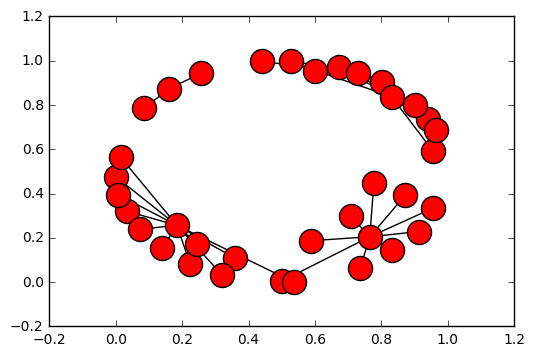

In [12]:
G=nx.from_pandas_dataframe(df,'attacker_king','attacker_commander')
nx.draw_networkx(G,with_labels=False,label='attecker_Commander relation with attacker_king ')
plt.show()

#nx.draw_networkx_nodes(G, pos, node_size=600, node_color='w', alpha=0.4, node_shape='d')
#nx.draw_networkx_nodes(G,pos=nx.spring_layout(G),node_shape='o')
#nx.draw_networkx_nodes(G,node_shape='s')

#G1=nx.Graph()
#S1=pd.Series(df['attacker_king'])
#nx.draw_networkx(G,with_labels=False)
#G1.add_nodes_from(S1)
#nx.draw_networkx_nodes(G1,pos=nx.spring_layout(G1),node_shape='o')
#plt.show()

#G2=nx.Graph()
#S2=pd.Series(df['attacker_commander'])
#G1.add_nodes_from(S2)
#nx.draw_networkx_nodes(G1,pos=nx.spring_layout(G1),node_shape='s')
#plt.show()


#G3=nx.compose(G1,G2)
#nx.draw(G3)
#plt.show()

# Defender_commander relation with attacker_king

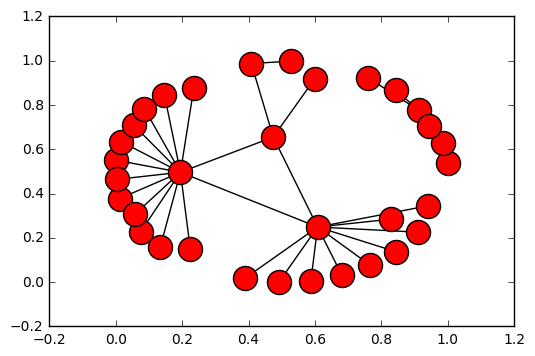

In [13]:
G=nx.from_pandas_dataframe(df,'attacker_king','defender_commander')
nx.draw_networkx(G,with_labels=False,label='defender_commander relation with attacker_king ')
plt.show()

# Distribution of attackers over attacker_king


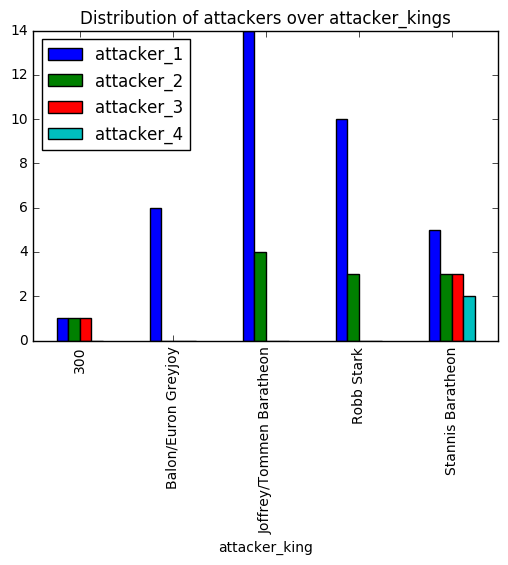

In [14]:
#matplotlib.style.use=('ggplot')
#df.plot()
#s1=pd.Series(df['attacker_king'])
#s2=pd.Series(df['attacker_1'])
#d = pd.DataFrame({'attacker_king': s1, 'attacker_1': s2})
#d.apply(pd.value_counts).plot(kind='', subplots=True)
#s1=s1.cumsum()
#s1.plot
#plt.show()
#df=df.cumsum()
#df1=DataFrame[df['attcker_king','attacker_1']]
#df1.plot.bar()
#(x='attacker_king',y='attacker_1')
#data=
#data.hist(column="attacker_king", by="attacker1")
#df.plot.bar(x='attacker_king',y='attacker_1',kind=str)
df[['attacker_1','attacker_2','attacker_3','attacker_4','attacker_king']].groupby('attacker_king').count().plot(kind='bar',title='Distribution of attackers over attacker_kings')

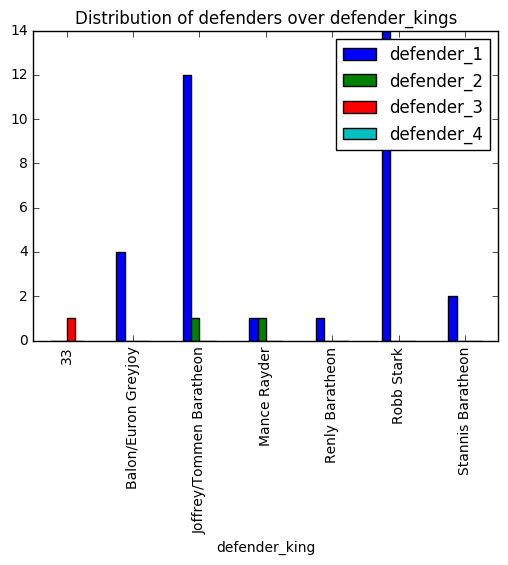

In [15]:
df.columns
df[['defender_1','defender_2','defender_3','defender_4','defender_king']].groupby('defender_king').count().plot(kind='bar',title='Distribution of defenders over defender_kings')

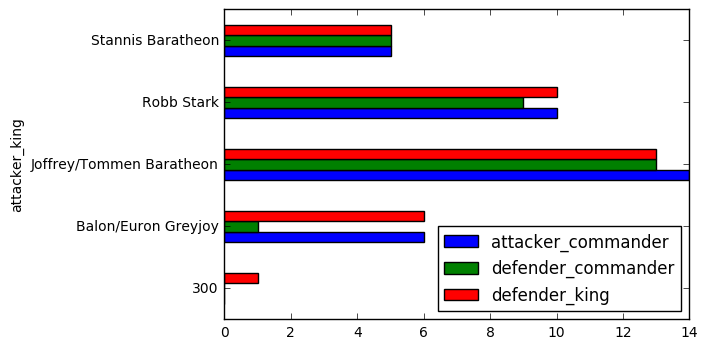

In [16]:
df[['attacker_commander','attacker_king','defender_commander','defender_king']].groupby('attacker_king').count().plot(kind='barh')

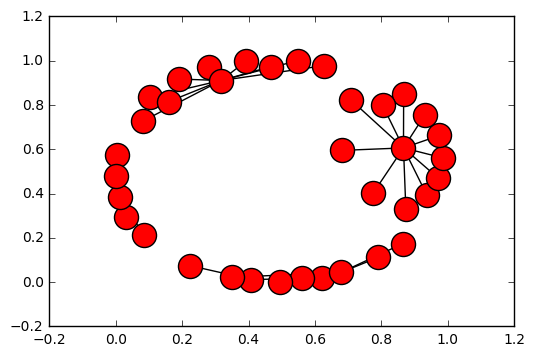

In [17]:
G1=nx.from_pandas_dataframe(df,'attacker_king','attacker_commander')
nx.draw_networkx(G1,with_labels=False,label='Family-1 ')
plt.show()

# PageRank of the Family graph(G1)

In [18]:
pr=nx.pagerank(G1)
pr

{nan: 0.04787234042553193,
 '300': 0.017730496453900707,
 'Asha Greyjoy': 0.017567303773603,
 'Balon/Euron Greyjoy': 0.07883014779865172,
 'Dagmer Cleftjaw': 0.017567303773603,
 'Daven Lannister, Ryman Fey, Jaime Lannister': 0.01617496640939734,
 'Euron Greyjoy, Victarion Greyjoy': 0.017567303773603,
 'Gregor Clegane': 0.01617496640939734,
 'Helman Tallhart': 0.016432806662028017,
 'Jaime Lannister': 0.01617496640939734,
 'Jaime Lannister, Andros Brax': 0.01617496640939734,
 'Joffrey/Tommen Baratheon': 0.1554087028299626,
 'Jonos Bracken, Jaime Lannister': 0.01617496640939734,
 'Loras Tyrell, Raxter Redwyne': 0.01617496640939734,
 'Mace Tyrell, Mathis Rowan': 0.01617496640939734,
 'Mance Rayder, Tormund Giantsbane, Harma Dogshead, Magnar Styr, Varamyr': 0.016534391534245664,
 'Ramsay Snow, Theon Greyjoy ': 0.01617496640939734,
 'Ramsey Bolton': 0.01617496640939734,
 'Robb Stark': 0.12988251781952562,
 'Robb Stark, Brynden Tully': 0.016432806662028017,
 'Robb Stark, Smalljon Umber, Blac

# Communities

In [27]:
part = community.best_partition(G)



AttributeError: 'module' object has no attribute 'best_partition'